In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [20]:
# Census
path = r'/Users/suzhengyang/Desktop/repair.nosync/Ploting/Census/'
all_files = glob.iglob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
census = pd.concat(df_from_each_file, ignore_index=True)
census_max = census.groupby(['#Attribtues', 'Threshold']).agg({'#Minimal Separators': np.max}).reset_index().merge(census, on=['#Attribtues', 'Threshold', '#Minimal Separators']).groupby(['#Attribtues', 'Threshold', '#Minimal Separators']).agg({'total Running time': np.max}).reset_index()
print(census_max)

#Attribtues  Threshold  #Minimal Separators  total Running time
0             4       0.00                    0               71029
1             4       0.01                    3               61818
2             4       0.10                    2               55545
3             8       0.00                    1              943755
4             8       0.01                    9              866412
5             8       0.10                   11             1059081
6            13       0.00                   17            12989292
7            13       0.01                   60            14109720
8            13       0.10                   33            14442153
9            17       0.00                    4            16382860
10           17       0.01                    4            16564255
11           17       0.10                    4            16347238


In [32]:
# Entity
path = r'/Users/suzhengyang/Desktop/repair.nosync/Ploting/EntitySource/'
all_files = glob.iglob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
census = pd.concat(df_from_each_file, ignore_index=True)
census_max = census.groupby(['#Attribtues', 'Threshold']).agg({'#Minimal Separators': np.max}).reset_index().merge(census, on=['#Attribtues', 'Threshold', '#Minimal Separators']).groupby(['#Attribtues', 'Threshold', '#Minimal Separators', 'Completed MinSeps']).agg({'total Running time': np.max}).reset_index()
census_max = census_max[census_max['Completed MinSeps'] == True]
print(census_max)

#Attribtues  Threshold  #Minimal Separators  Completed MinSeps  \
0             3       0.00                    1               True   
1             3       0.01                    1               True   
2             3       0.10                    1               True   
3             6       0.00                    4               True   
4             6       0.01                    3               True   
5             6       0.10                    2               True   
6             7       0.00                    7               True   
7             7       0.01                    6               True   
8             7       0.10                    9               True   
9             8       0.00                    4               True   
10            8       0.01                   12               True   
11            8       0.10                    7               True   
12           10       0.00                   18               True   
13           10       0.

Text(0.5, 1, 'Census')

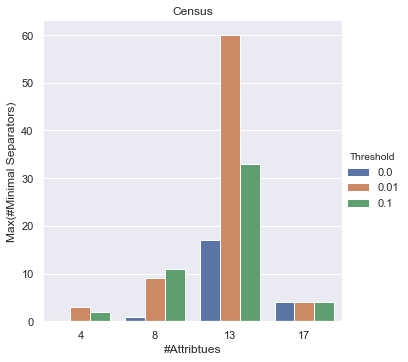

In [4]:
sns.set()
sns.catplot(x="#Attribtues", y="#Minimal Separators", data=census_max, hue="Threshold", kind="bar").set(ylabel="Max(#Minimal Separators)")

plt.title("Census")

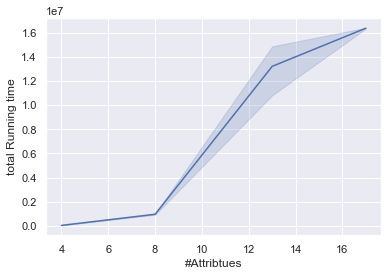

In [5]:
sns.set()
sns.lineplot(x="#Attribtues", y="total Running time", data=census)
